In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [2]:
#loading the dataset and exploring it
df =pd.read_excel('C:/Users/prant/Downloads/stockprice.xlsx')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [5]:
df.shape

(1009, 7)

In [6]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [7]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

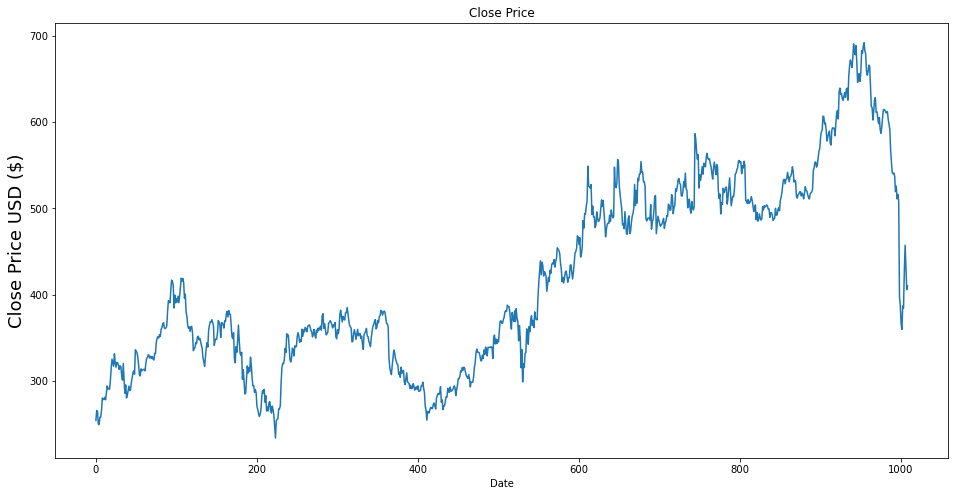

In [14]:
#plotting close price{}
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.show()

In [15]:
#scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [16]:
# split data into training and testing datasets
training_size = int(len(scaled_data) * 0.8)
testing_size = len(scaled_data) - training_size
train_data, test_data = scaled_data[0:training_size,:], scaled_data[training_size:len(scaled_data),:]


In [17]:
# create input and output data for LSTM model
def create_data(dataset, lookback=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookback-1):
        a = dataset[i:(i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i + lookback, 0])
    return np.array(dataX), np.array(dataY)

lookback = 20
trainX, trainY = create_data(train_data, lookback)
testX, testY = create_data(test_data, lookback)

In [18]:
# create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
# train LSTM model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
786/786 - 9s - loss: 0.0030 - 9s/epoch - 12ms/step
Epoch 2/100
786/786 - 5s - loss: 0.0012 - 5s/epoch - 6ms/step
Epoch 3/100
786/786 - 5s - loss: 0.0010 - 5s/epoch - 7ms/step
Epoch 4/100
786/786 - 5s - loss: 9.2875e-04 - 5s/epoch - 7ms/step
Epoch 5/100
786/786 - 5s - loss: 7.9644e-04 - 5s/epoch - 6ms/step
Epoch 6/100
786/786 - 5s - loss: 6.8196e-04 - 5s/epoch - 6ms/step
Epoch 7/100
786/786 - 5s - loss: 7.6252e-04 - 5s/epoch - 6ms/step
Epoch 8/100
786/786 - 5s - loss: 6.6653e-04 - 5s/epoch - 7ms/step
Epoch 9/100
786/786 - 5s - loss: 6.3916e-04 - 5s/epoch - 7ms/step
Epoch 10/100
786/786 - 5s - loss: 6.8096e-04 - 5s/epoch - 6ms/step
Epoch 11/100
786/786 - 5s - loss: 6.4785e-04 - 5s/epoch - 7ms/step
Epoch 12/100
786/786 - 5s - loss: 6.3055e-04 - 5s/epoch - 7ms/step
Epoch 13/100
786/786 - 5s - loss: 6.3046e-04 - 5s/epoch - 6ms/step
Epoch 14/100
786/786 - 5s - loss: 6.7853e-04 - 5s/epoch - 6ms/step
Epoch 15/100
786/786 - 5s - loss: 6.1418e-04 - 5s/epoch - 6ms/step
Epoch 16/100
78

In [22]:
# make predictions using LSTM model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


6/6 [==============================] - 0s 7ms/step


In [23]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [24]:
trainScore = np.sqrt(np.mean((trainY[0] - trainPredict[:,0])**2))
print('Train RMSE: {:.2f}'.format(trainScore))
testScore = np.sqrt(np.mean((testY[0] - testPredict[:,0])**2))
print('Test RMSE: {:.2f}'.format(testScore))


Train RMSE: 10.31
Test RMSE: 18.73


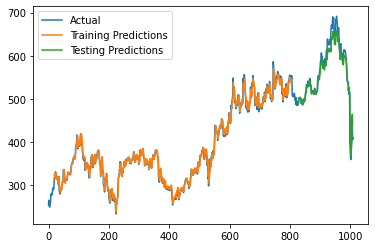

In [26]:
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
testPredictPlot = np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(scaled_data)-1, :] = testPredict
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual', 'Training Predictions', 'Testing Predictions'])
plt.show()
plt.show()